 
# Specifying node colours

[Open interactive notebook in Binder](https://mybinder.org/v2/gh/wiheto/netplotbrain/main?filepath=docs/gallery/specifying_node_color.ipynb)

There are three different ways to specify different colours of nodes.
Both are done by setting node_color keyword argument.
If this column consists of category data, different categories will be plotted.
If this column consists of continuous data, a colour spectrum will be plotted. 
If this column consists of differernt colours, these colours will be plotted. 

In this notebook we will see an example of each of the three different ways.

See [example about cmap for specifying colormaps](https://www.netplotbrain.org/gallery/node_cmap/) 

In [1]:
# Import packages
import templateflow.api as tf
import netplotbrain
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Download atlas information from templateflow
atlasinfo = tf.get(template='MNI152NLin2009cAsym',
                   atlas='Schaefer2018',
                   desc='100Parcels7Networks',
                   extension='.tsv')
atlas_df = pd.read_csv(str(atlasinfo), sep='\t')
atlas_df.head()

,index,name,color
0,1,7Networks_LH_Vis_1,#781283
1,2,7Networks_LH_Vis_2,#781284
2,3,7Networks_LH_Vis_3,#781285
3,4,7Networks_LH_Vis_4,#781287
4,5,7Networks_LH_Vis_5,#781288


In [3]:
# Extract the network from each roi name
networks = list(map(lambda x: x.split('_')[2], atlas_df.name.values))
atlas_df['network'] = networks

In [4]:
# Add a continuous variable between 0-10 
atlas_df['centrality'] = np.tile(np.arange(0,10), 10)

In [5]:
# Lets have a look at the data frame now with three different columns for colours
atlas_df.head()

,index,name,color,network,centrality
0,1,7Networks_LH_Vis_1,#781283,Vis,0
1,2,7Networks_LH_Vis_2,#781284,Vis,1
2,3,7Networks_LH_Vis_3,#781285,Vis,2
3,4,7Networks_LH_Vis_4,#781287,Vis,3
4,5,7Networks_LH_Vis_5,#781288,Vis,4


In [6]:
# define the nodes as templateflow dict
nodes = {'template': 'MNI152NLin2009cAsym',
         'atlas': 'Schaefer2018',
          'desc': '100Parcels7Networks',
          'resolution': 1}

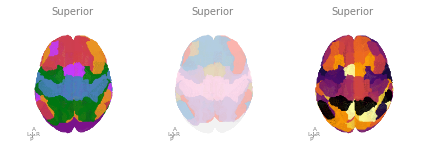

In [7]:
# Initiative a custom figure
fig = plt.figure() 
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
# Plot the three figures changing only the node_color column and node_cmap
# The additional information from atkas_df is added into nodes_df keyword argument.
fig, ax1 = netplotbrain.plot(nodes=nodes, nodes_df=atlas_df, node_type='parcels', node_color='color', view='S', fig=fig, ax=ax1, showlegend=False)
fig, ax2 = netplotbrain.plot(nodes=nodes, nodes_df=atlas_df, node_type='parcels', node_color='network', node_cmap='Pastel1', view='S', fig=fig, ax=ax2, showlegend=False)
fig, ax3 = netplotbrain.plot(nodes=nodes, nodes_df=atlas_df, node_type='parcels', node_color='centrality', node_cmap='inferno', view='S', fig=fig, ax=ax3, showlegend=False)